# БАНКИ: анализ оттока клиентов

**СОДЕРЖАНИЕ ПРОЕКТА**
1. [ОПИСАНИЕ ПРОЕКТА: введение в проект, заказчик, цель исследования, конечный результат, план исследования, структура данных](#describ)

2. [ШАГ 1.ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ](#part_1)

3. [ШАГ 2.ПОДГОТОВКА ДАННЫХ](#part_2)
   
4. [ШАГ 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)](#part_3)    
    
5. [ШАГ 4. ПРОВЕРКА ГИПОТЕЗ](#part_4) 

6. [ШАГ 5. ПОДВЕДЕНИЕ ПРОМЕЖУТОЧНЫХ ИТОГОВ](#part_5) 
   
7. [ШАГ 6. СЕГМЕНТАЦИЯ](#part_6)

8. [ШАГ 7. ПРИОРИТИЗАЦИЯ СЕГМЕНТОВ](#part_7)

9. [ШАГ 8. ФОРМИРОВАНИЕ РЕКОМЕНДАЦИЙ (ТАРГЕТИРОВАННЫХ) ПО РАБОТЕ С ВЫДЕЛЕННЫМИ СЕГМЕНТАМИ](#part_8)

10. [ШАГ 9. ЗАГРУЗКА ПРЕЗЕНТАЦИИ (ССЫЛКА)](#part_9)

11. [ШАГ 10. ССЫЛКА НА ДАШБОРД](#part_10)

### ОПИСАНИЕ ПРОЕКТА

**Введение в проект:** <a id="describ"></a> 
*В «Метанпромбанке», одном из лучших банков страны, повысился отток клиентов. Ретроспектива: ранее было проведено исследование оттока клиентов, составлены дэшборды и выделены сегменты, но клиентская база изменилась, и решения не работают. В связи с этим необходим аналитик, который бы провел сегментирование пользователей банка и анализ оттока клиентов.*

**Заказчик исследования:** *отдел маркетинга «Метанпромбанка»*

**Цель исследования:** *анализ клиентов регионального банка и выделение сегментов клиентов, склонных уходить из банка*.

**Конечный результат:** *выделить отточные сегменты, дать рекомендации по снижению оттока клиентов банка. Для визуализации полученных результатов составить дашборд. Основные графики, выводы и рекомендации представить в форме презентации*

**План исследования**:
* 1. **Загрузить и описать данные:** 
        * 1.1. измерение объема датасета; 
        * 1.2. измерение количества столбцов и строк;
* 2. **Подготовка данных:**
        * 2.1. вывод информации по датафрейму; 
        * 2.2. в случае необходимости приведение наименования столбцов к одному виду; 
        * 2.3. исследование типов данных столбцов и соответствия их типов (в случае необходимости изменить на нужный тип); 
        * 2.4. исследование пропущенных значений, их природы, принятие решения о действиях с пропущенными значениями (замена, удаление, оставление, как есть); 
        * 2.5. исследование данных на дубликаты в целом по всем столбцам, а также по столбцу userid);
        * 2.6. выводы;
* 3. **Исследовательский анализ данных EDA:**
        * 3.1. исследование выбросов в значениях (построение диаграммы размаха - ящик с усами); 
        * 3.2. исследование распределения признаков: категориальные (столбчатая диаграмма), числовые (гистограмма распределения);
        * 3.3. вычисление числовых характеристик количественных значений признаков (медиана, среднее значение), для качественных вычисление моды;
        * 3.3. построение матрицы корреляции;
        * 3.4. исследование влияния признаков на отток клиентов (сводные таблицы и диаграммы); 
        * 3.5. выполнение сегментации по степени оттока (формирование портретов отточных клиентов);
        * 3.6. выводы;
* 4. **Проверка гипотез:**
        * 4.1. Гипотеза 1: средний доход (заработная плата) клиентов влияет на отток;
        * 4.2. Гипотеза 2: гипотезу относительно представленных данных, которая поможет внести ясность в исследование;
* 5. **Подведение промежуточных итогов** (выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на отток);
* 6. **Сегментация** (отток больше, чем средний уровень оттока по банку);
* 7. **Приоритизация сегментов**;
* 8. **Формирование рекомендаций (таргетированных) по работе с выделенными сегментами.**
* 9. **Загрузка презентации (ссылка)**
* 10. **Ссылка на дашборд**

**Структура данных:** 

*Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.*

* userid — идентификатор пользователя,
* score — баллы кредитного скоринга,
* City — город,
* Gender — пол,
* Age — возраст,
* Objects — количество объектов в собственности
* equity — количество баллов собственности
* Balance — баланс на счёте,
* Products — количество продуктов, которыми пользуется клиент,
* CreditCard — есть ли кредитная карта,
* Loyalty / last_activity — активный клиент,
* estimated_salary — заработная плата клиента,
* Churn — ушёл или нет.

### ШАГ 1. ЗАГРУЗКА ДАННЫХ
<a id="part_1"></a> 

Загружаем и подключаем библиотеки

In [1]:
! pip install phik

In [2]:
import pandas as pd 
import numpy as np

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from scipy.stats import mode 
from scipy import stats as st

In [6]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

**Выполним:**
* 1.1. измерение объема датасета; 
* 1.2. измерение количества столбцов и строк;

In [7]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv', sep = ',') 
display(data.head(5)) 

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [8]:
data.shape

(10000, 12)

* **Датасет состоит из 10000 строк и содержит 12 столбцов.** 
* **Наименования столбцов нужно будет привести к нижнему регистру** 

### ШАГ 2. ПОДГОТОВКА ДАННЫХ
<a id="part_2"></a> 

#### Выведем информацию по датафрейму

In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**По типу данных:** 
* 1) тип данных в столбцах`'score'` и `'age'` заменим на int (т.к. там даны только целые значения)
* 2) также можно округлить значения в столбце `'balance'` и `'est_salary'` до целого и также привести тип к int

#### Приведем наименования столбцов к нижнему регистру

Приведем название столбцов к нижнему регистру. Можно также переименовать столбец 'userid' на 'user_id'

In [10]:
data.columns = data.columns.str.lower()
data=data.rename(columns={'userid':'user_id'}) 

#### Изменим типы данных в столбцах

Изменим тип данных в столбце 'score' на int. Изменим тип данных в столбце 'est_salary' на int, предварительно округлив значения до целых (округление до целых рублей на анализе данных не отразится, т.к. копейки в данном случае не вносят существенный вклад в общую сумму и на результат никак не повлияют)

In [11]:
data['score'] = data['score'].astype('int') 
data['est_salary'] = data['est_salary'].apply(lambda x: round(x)).astype('int') 

#### Исследование пропущенных значений, их природы, принятие решения о действиях с пропущенными значениями

In [12]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

**По столбцу `'balance'` пропущено 2295 значений (23%). В столбце `'age'` пропущено 26 значений.**

**Для того чтобы понять, как правильно обработать пропуски, необходимо определить механизмы их формирования. Различают следующие 3 механизма формирования пропусков: MCAR, MAR, MNAR.** 
* MCAR (Missing Completely At Random) — механизм формирования пропусков, при котором вероятность пропуска для каждой записи набора одинакова. 
* MAR (Missing At Random) — на практике данные обычно пропущены не случайно, а ввиду некоторых закономерностей. Пропуски относят к MAR, если вероятность пропуска может быть определена на основе другой имеющейся в наборе данных информации (пол, возраст, занимаемая должность, образование…), не содержащей пропуски. В таком случае удаление или замена пропусков на значение «Пропуск», как и в случае MCAR, не приведет к существенному искажению результатов.
* MNAR (Missing Not At Random) — механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов. 

In [13]:
data.loc[data['age'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160369,0
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,135693,0
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310,1
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775,0
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67836,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,137501,0
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002,0
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,1,0,159249,0
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75207,0


**Значения показывают, что вероятность пропуска для каждой записи набора в столбце `'age'`одинакова, то есть здесь механизм формирования пропуска MСAR, а следовательно их можно отбросить или заполнить. В связи с тем, что пропущенных данных в столбце из 10000 строк всего 26 - их будем удалять.** 

In [14]:
data.dropna(subset=['age'], inplace=True)

In [15]:
data.isna().sum() # исследуем данные на пропуски

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [16]:
# изменим тип данных в столбце на целочисленный
data['age'] = data['age'].astype('int')

In [17]:
# рассмотрим данные с пропущенными значениями в столбце balance
data.loc[data['balance'].isnull()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238056,0
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820,0
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469,0
19,127034,922,Рыбинск,Ж,53,0,NaN,1,0,0,147095,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876,Ростов,М,38,0,NaN,1,0,0,171764,0
9984,125941,729,Ярославль,Ж,42,0,NaN,1,1,1,687539,0
9993,219924,884,Рыбинск,Ж,36,0,NaN,1,1,1,169845,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898,0


**Данных в столбце `'balance'` пропущено 2279 значений (23%). Это большое количество. Нужно дополнительное исследование для определения природы пропусков. В данном случае данные пока оставим, как есть.**

In [18]:
data_1 = data.copy() # сделаем копию датафрейма

In [19]:
# создадим новый столбец flag с кодировкой значений по столбцу balance, где 1- значение пропущено, 0 - заполнено
data_1.loc[data['balance'].isnull(), 'flag']=1
data_1.loc[data['balance']>=0, 'flag']=0
data_1['flag']=data_1['flag'].astype('int') # приведем значения столбца к типу int

In [20]:
display(data_1.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86622,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683,0,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174424,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353,1,0


In [21]:
# находим среднее значение по возрасту и зарплате
data_skip = data_1.pivot_table(index = 'flag', values = ['age', 'est_salary'], aggfunc = 'mean') 
data_skip.columns = ['mn_age', 'mn_salary']

# находим медианное значение по собственности и количеству продуктов
data_skip_2 = data_1.pivot_table(index = 'flag', values = ['equity', 'products'], aggfunc = 'median')
data_skip_2.columns = ['md_equity', 'md_products']

# находим моду по полу
agg_func_stats = {'gender': [pd.Series.mode]}
data_skip_5 =data_1.groupby(['flag']).agg(agg_func_stats)
data_skip_5.columns = ['mod_gender']

# находим моду по городу
agg_func_stats = {'city': [pd.Series.mode]}
data_skip_6 =data_1.groupby(['flag']).agg(agg_func_stats)
data_skip_6.columns = ['mod_city']

# находим моду по наличию кредитной карты
agg_func_stats = {'credit_card': [pd.Series.mode]}
data_skip_7 =data_1.groupby(['flag']).agg(agg_func_stats)
data_skip_7.columns = ['mod_ccard']

# находим моду по наличию оттока
agg_func_stats = {'churn': [pd.Series.mode]}
data_skip_8 =data_1.groupby(['flag']).agg(agg_func_stats)
data_skip_8.columns = ['mod_churn']

# объединяем все в одну таблицу
result = data_skip.join([data_skip_2, data_skip_5, data_skip_6, data_skip_7, data_skip_8])
result['flag'] = [0, 1]
display(result)

,mn_age,mn_salary,md_equity,md_products,mod_gender,mod_city,mod_ccard,mod_churn,flag
flag,,,,,,,,,
0,42.924366,124520.389864,4,2,Ж,Ярославль,1,0,0
1,42.093023,226345.427819,0,1,М,Ярославль,1,0,1


In [22]:
list_1 = ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'flag']
corr_1 = data_1[list_1].corr()
corr_1.style.background_gradient(cmap='coolwarm')

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,flag
score,1.000000,-0.011814,0.064809,0.235283,-0.004071,-0.095261,-0.030343,0.164166,0.106404,0.138762
age,-0.011814,1.000000,0.020628,0.069745,0.017182,-0.123128,-0.008157,-0.039598,-0.049797,-0.028659
equity,0.064809,0.020628,1.000000,0.163793,0.430945,-0.167271,-0.002011,-0.171515,0.270084,-0.709036
balance,0.235283,0.069745,0.163793,1.000000,0.075716,-0.059850,0.024770,0.338800,0.085915,nan
products,-0.004071,0.017182,0.430945,0.075716,1.000000,-0.251120,0.037555,-0.117556,0.300621,-0.486232
credit_card,-0.095261,-0.123128,-0.167271,-0.059850,-0.251120,1.000000,-0.033173,0.036006,-0.130388,0.157637
last_activity,-0.030343,-0.008157,-0.002011,0.024770,0.037555,-0.033173,1.000000,0.002944,0.169420,0.028400
est_salary,0.164166,-0.039598,-0.171515,0.338800,-0.117556,0.036006,0.002944,1.000000,0.001705,0.306957
churn,0.106404,-0.049797,0.270084,0.085915,0.300621,-0.130388,0.169420,0.001705,1.000000,-0.248984
flag,0.138762,-0.028659,-0.709036,nan,-0.486232,0.157637,0.028400,0.306957,-0.248984,1.000000


* **Рассчитанные меры центральных тенденций показывают, что значения в столбце balance `не заполнены у мужчин` со средним возрастом 42 года, имеющих среднюю зарплату 226 тыс, не имеющих собственности и использующих один банковский продукт**
* **`Женщины` в возрасте 42 года с средней зарплатой 124,5 тыс с собственнстью 4 и использующие 2 банковских продукта баланс `указывают`**

* **Результаты показывают, что имеется разница в мерах центральных тенденции по пропускам и заполненным данным. А следовательно пропуски зависят от данных. И здесь имеется механизм формирования MNAR, поэтому нельзя их отбросить или заполнить одним значением. В матрице корреляции признаков можно увидеть сильную обратную взаимосвязь между сформированным признаком по заполнению баланса и количеством баллов собственности (то есть, чем больше балл собственности, тем меньше незаполненных строк по балансу), кроме этого имеется сильная обратная связь между количеством используемых банковских продуктов и сформированным признаком по столбцу баланс (чем больше банковских продуктов использует клиент, тем меньше незаполненных строк по балансу). Данный факт также указывает на то, что имеется зависимость между балансом на счете, количеством объектов собственоости и используемых банковских продуктов.** 
* **Можно предположить, что баланс не указан, так как клиент не имеет зарплатной карты данного банка, но, наприер, платит в этом банке кредит или ипотеку** 

#### Исследование данных на дубликаты

In [23]:
# проверим данные на явные дубликаты
data.duplicated().sum()

0

**Явных дубликатов нет**

In [24]:
# проверим данные на дубликаты по столбцу user_id
data['user_id'].duplicated().sum()

50

**Имеется 50 дублирующих записей. Проведем расследование.**

In [25]:
# data[data.duplicated(['user_id'], keep=False)]

In [26]:
# выведем сумму уникальных значений по столбцу
data['user_id'].value_counts()

120258    2
217643    2
199312    2
170312    2
200863    2
         ..
181682    1
179637    1
173494    1
175543    1
215039    1
Name: user_id, Length: 9924, dtype: int64

In [27]:
# рассмотрим данные с дубликатами
data.loc[data['user_id']== 120258]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160328,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146428,0


In [28]:
# рассмотрим данные с дубликатами
data.loc[data['user_id']== 217643]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1970,217643,845,Ярославль,М,29,5,733098.45,4,1,1,41443,1
4186,217643,804,Рыбинск,Ж,40,2,301836.65,2,1,1,81137,0


**Наблюдается повтор идентификаторов пользователей, возможно, это связано с тем, что идентификатор ушедшего клиента присваивается вновь пришедшему.**

In [29]:
data_dup = data[data.duplicated(['user_id'], keep=False)]
data_dup_1 = data_dup.query('churn==1')
display(data_dup_1[data_dup_1.duplicated(['user_id'], keep=False)])

data_dup_2 = data_dup.query('churn==0')
display(data_dup_2[data_dup_2.duplicated(['user_id'], keep=False)])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


#### Исследование выбросов в значениях

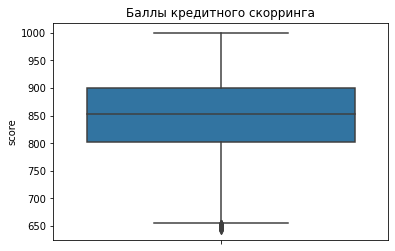

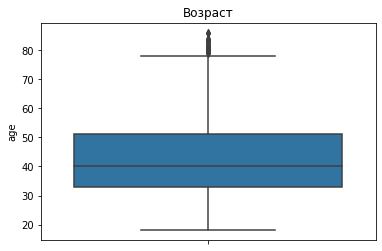

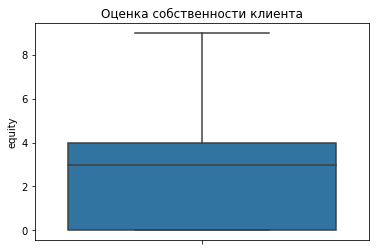

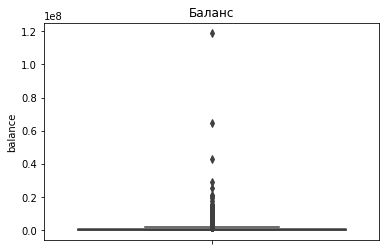

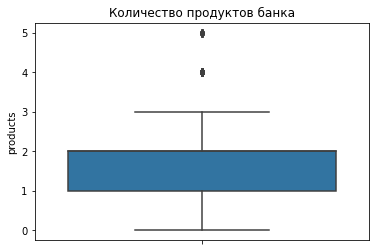

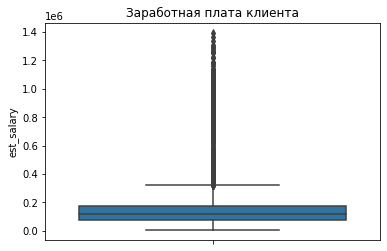

In [30]:
features = pd.DataFrame({'col' : ['score', 'age', 'equity', 'balance', 'products', 'est_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Оценка собственности клиента', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента']
                       })
for i in features.itertuples():
    sns.boxplot(y=i[1], data=data)
    plt.title(i[2])
    plt.ylabel(i[1])
    plt.show(); 

**Согласно графикам, а также рассчитанным выше числовым характеристикам, имеются большие значения в данных по столбцу баланс, зарплата, количество продуктов банка,имеется небольшой "хвост" по возрасту и баллам кредитного скоринга.**

In [31]:
# рассмотрим данные с выбросами
data.loc[data['balance']>40000000]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1059,114103,894,Ярославль,М,58,4,6.486621e+07,2,1,1,88862,1
1846,114088,927,Ярославль,М,57,5,4.327710e+07,3,0,1,82619,0
7597,156149,900,Ярославль,М,62,5,1.191136e+08,2,1,1,138041,0


In [32]:
# рассмотрим данные с выбросами
data.loc[data['products']>=5]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
401,187761,868,Ярославль,Ж,19,4,8126.88,5,1,1,85324,0
523,195914,852,Ярославль,Ж,39,5,1388255.70,5,1,1,135432,1
893,132781,820,Ярославль,М,37,5,259677.16,5,1,1,124261,0
1019,122402,833,Ростов,М,32,3,234560.94,5,1,1,106034,0
1346,159649,847,Ярославль,Ж,39,1,137974.02,5,1,1,219672,0
1479,209431,882,Рыбинск,М,42,4,1142013.06,5,1,0,101052,1
1880,134758,850,Ярославль,Ж,35,4,282262.33,5,1,1,105312,0
3274,155765,863,Ярославль,М,30,5,1036114.50,5,1,1,150744,1
3809,191408,838,Ростов,М,28,2,99461.51,5,1,1,88642,0
3884,138642,823,Ярославль,Ж,37,1,118329.87,5,1,1,105095,0


In [33]:
# рассмотрим данные с выбросами
data.loc[data['est_salary']>1000000]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
125,227092,1000,Ярославль,М,32,5,19757180.85,2,1,1,1024626,0
149,218801,958,Ярославль,М,34,0,NaN,1,1,0,1292826,0
178,226887,890,Ярославль,М,49,4,3956103.10,2,1,0,1120529,0
250,210357,766,Ярославль,М,27,0,NaN,1,1,0,1015754,0
296,204143,925,Ярославль,М,25,0,NaN,2,1,0,1001009,0
302,164876,942,Ярославль,М,40,0,NaN,1,1,0,1256538,0
663,180853,949,Ярославль,М,45,0,NaN,1,1,0,1142166,0
996,127574,749,Ярославль,М,35,0,NaN,1,1,0,1071601,0
1027,119793,1000,Ярославль,М,50,5,12909691.02,1,1,0,1253653,0
1273,136567,961,Ярославль,М,31,0,NaN,1,1,0,1015386,1


**В данном случае причина появления выбросов неясна:
по балансу, баллам собственности и заработной плате в выборке данные выглядят довольно достоверно по остальным показателям. Импутацию выбросов в данном случае выполнять не будем.**

In [34]:
# закодируем столбцы с категориальной переменной (city, gender). 
# Создаем столбцы с кодировкой городов
data_dum = pd.get_dummies(data['city'])
# Добавляем новые столбцы к исходному датафрейму
data = pd.concat([data, data_dum], axis=1)
# Создаем столбцы с кодировкой пола
data_dum_1 = pd.get_dummies(data['gender'])
# Добавляем новые столбцы к исходному датафрейму
data = pd.concat([data, data_dum_1], axis=1)

display(data.head(10))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86622,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174424,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353,1,0,0,1,0,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156620,0,0,1,0,0,1
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838,0,0,0,1,1,0
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085,0,0,0,1,1,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155372,0,0,0,1,0,1
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238056,0,0,0,1,1,0


**ВЫВОДЫ ПО РАЗДЕЛУ:**
* 1) Датасет состоит из 10000 строк и содержит 12 столбцов;
* 2) Данных в столбцах 'score', 'age' и 'est_salary' привели к целочисленному типу; 
* 3) Наименования столбцов привели к одному виду
* 4) По столбцу 'balance' пропущено 2295 значений (23%). В столбце 'age' пропущено 26 значений. Пропущенные значения в столбце 'age' были удалены (их немного, не влияют на ход исследования, механизм формирования пропуска MCAR). При помощи метода индикаторов, а также с помощью применения матрицы корреляций было установлено, что пропуски в столбце 'balance' не случайны, они сильно зависят от других признаков в таблице (механизм формирования пропуска MNAR). Скорее всего пропуски в балансе имеют клиенты, который взяли в банке только кредит, а вот зарплатная карта находится в другом банке.
* 5) Явных дубликатов не обнаружено, но имеется 50 дублирований идентификатора пользователя, скорее всего, это связано с тем, что идентификатор ушедшего клиента присваивался вновь пришедшему. Такие дубликаты удалять не будем, они будут полезны для определения оттока клиентов.
* 6) По аномальным значениям: график "ящик с усами" показывает, что в столбце зарплата и баланс имеются данные с большими значениями, при этом остальные параметры по клиентам показывают, что такие значения имеют место быть, мы не можем в целом установить причину таких больших значений, а значит удалять данные "значения" не будем.
* 7) Также прокодированы значения в двух категориальных столбцах (city, gender)

### ШАГ 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)
<a id="part_3"></a> 

#### Исследование значений данных (числовые характеристики, количество уникальных значений в столбцах)

In [35]:
# сформируем список числовых столбцов и выведем числовые характеристики по каждому столбцу
coll = ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']
display(data[coll].describe().T)

,count,mean,std,min,25%,50%,75%,max
score,9974.0,848.682575,6.539972e+01,642.0,802.000,853.00,900.000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.000,40.00,51.000,8.600000e+01
equity,9974.0,2.630840,1.979965e+00,0.0,0.000,3.00,4.000,9.000000e+00
balance,7695.0,827245.587515,1.980327e+06,0.0,295698.715,524295.33,980051.215,1.191136e+08
products,9974.0,1.871466,7.927286e-01,0.0,1.000,2.00,2.000,5.000000e+00
credit_card,9974.0,0.680168,4.664345e-01,0.0,0.000,1.00,1.000,1.000000e+00
last_activity,9974.0,0.522859,4.995022e-01,0.0,0.000,1.00,1.000,1.000000e+00
est_salary,9974.0,147786.808703,1.392855e+05,2546.0,75252.000,119627.00,174499.750,1.395064e+06
churn,9974.0,0.182374,3.861720e-01,0.0,0.000,0.00,0.000,1.000000e+00


* Баллы кредитного скоринга распределяются: min - 642, max - 1000, среднее значений - 848, медианное - 853;
* Возраст клиентов: min - 18, max - 86, среднее значение - 42,7, медианное - 40;
* Количество баллов собственности: min - 0, max - 9, среднее значение - 2,6, медианное - 3;
* Количество продуктов, которыми пользуется клиент: min - 0, max - 5, среднее значение - 1,9, медианное - 2;
* Кредитные карты имеет половина клиентов, среднее значение - 0,68;
* Активных клиентов также половина, среднее значение - 0,52;
* Заработная плата min - 2546, max - 1395064, среднее значение - 147786, медианное - 119627;
* Среднее значение показателя ухода клиента равно 0,18

In [36]:
# исследуем каждый столбец датасета на количество уникальных значений
for i in data.columns:
    x = data[i].value_counts()
    print("Наименование столбца:",i, x)

Наименование столбца: user_id 120258    2
217643    2
199312    2
170312    2
200863    2
         ..
181682    1
179637    1
173494    1
175543    1
215039    1
Name: user_id, Length: 9924, dtype: int64
Наименование столбца: score 900    80
889    75
899    70
894    69
912    68
       ..
666     1
667     1
995     1
998     1
671     1
Name: score, Length: 348, dtype: int64
Наименование столбца: city Ярославль    5875
Рыбинск      2683
Ростов       1416
Name: city, dtype: int64
Наименование столбца: gender М    4991
Ж    4983
Name: gender, dtype: int64
Наименование столбца: age 36    414
37    402
33    392
35    388
34    384
     ... 
83      3
84      2
86      2
82      2
79      2
Name: age, Length: 68, dtype: int64
Наименование столбца: equity 0    2576
5    1915
4    1847
3    1541
2    1051
1     773
6     161
7      80
8      17
9      13
Name: equity, dtype: int64
Наименование столбца: balance 0.00          2
26.00         2
38.00         2
39.00         2
1500606.59    1

* По столбцу `user_id`: под одним user_id записано несколько пользователей;
* По столбцу `score`: наибольшее количество значений (80) соответствует 900 баллам кредитного скоринга;
* По столбцу `city`: наибольшее количество пользователей обслуживается банком в Ярославле (5875), Рыбинске (2683), Ростове (1416);
* По столбцу `gender`: мужчин - 4991, женщин - 4983;
* По столбцу `age`: наибольшее количество клиентов в возрасте 36 лет (414);
* По столбцу `equity`: у 2567 пользователей количество баллов собственности равно 0, у 1915 - 5, далее по уменьшению 4,3,2,1,6,7,8,9;
* По столбцу `products`: 5119 клиентов пользуются 2 продуктами банка, 3323 - 1, 1038 - 3;
* По столбцу `credit_card`: 8784 - имеют карту, 3190 - нет
* По столбцу `last_activity`: 5215 - активные клиенты, 4759 - неактивные;
* По столбцу `churn`: 8155 - клиенты, 1819 - ушли.

#### Исследование распределения признаков

In [37]:
num = pd.DataFrame({'col' : ['score', 'age', 'equity', 'balance', 'products', 'est_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Оценка собственности клиента', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента']
                       })

cat = pd.DataFrame({'col' : ['city', 'gender',  'credit_card', 'last_activity', 'equity', 'products'],
                            'title' : ['Город', 'Пол',  'Наличие кредитной карты', 
                                       'Активность', 'Оценка собственности клиента', 'Количество продуктов банка']
                            })

In [38]:
print(num)

          col                         title
0       score    Баллы кредитного скорринга
1         age                       Возраст
2      equity  Оценка собственности клиента
3     balance                        Баланс
4    products    Количество продуктов банка
5  est_salary      Заработная плата клиента


In [39]:
print(cat)

             col                         title
0           city                         Город
1         gender                           Пол
2    credit_card       Наличие кредитной карты
3  last_activity                    Активность
4         equity  Оценка собственности клиента
5       products    Количество продуктов банка


In [40]:
# С помощью цикла выведем столбчатые диаграммы и диаграммы размаха для количественных признаков:
#for i in num.itertuples():
    
    #fig, ax = plt.subplots(figsize=(15,6))
    
    #sns.histplot(data=data, hue='churn', x= i[1], stat='density', 
                 #common_norm=False, palette = 'Set1', ax = plt.subplot(1, 2, 1))
    
    #plt.xlabel(i[1])
    #plt.ylabel('Нормализация по количеству клиентов')
    
    
    #sns.boxplot(data = data, x = 'churn', y = i[1], ax = plt.subplot(1, 2, 2), palette='Set1') 
    
    #plt.xlabel('')
    #plt.ylabel('')
    #plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
    
    #fig.suptitle(i[2])
    #plt.show()    

**Согласно графикам распределения непрерывных величин, отток клиентов был наибольшим на следующих интервалах:**

* балл кредитного скоринга в интервале 820-940 
* возраст 26-36 и 50-60 лет 
* оценка собственности клиента от 3-х и выше 
* баланс клиента от 750 тыс.руб. 
* количество продуктов банка от 3-х и более 
* заработная плата клиентов от 100 тыс до 210 тыс. 

Построим гистограммы для непрерывных величин

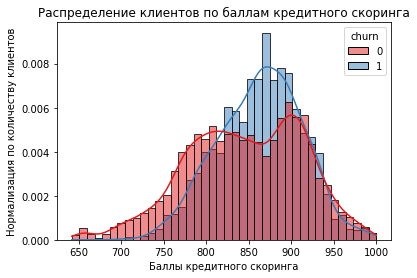

In [41]:
sns.histplot(data=data, hue='churn', x='score', stat='density', 
                 common_norm=False, palette = 'Set1', kde=True)
plt.title('Распределение клиентов по баллам кредитного скоринга')    
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Нормализация по количеству клиентов')
plt.show;

**По баллам кредитного скоринга отток клиентов в пределах 820-940 баллов**

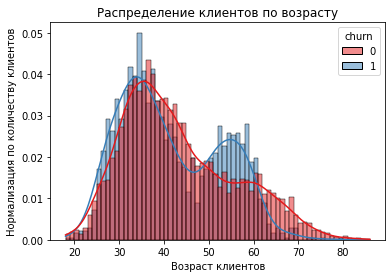

In [42]:
sns.histplot(data=data, hue='churn', x='age', binwidth =1, stat='density', 
                 common_norm=False, palette = 'Set1', kde=True)
plt.title('Распределение клиентов по возрасту')       
plt.xlabel('Возраст клиентов')
plt.ylabel('Нормализация по количеству клиентов')
plt.show;

**По возрасту клиентов: отток в пределах возраста клиентов 26-36 лет и 51-61 лет**

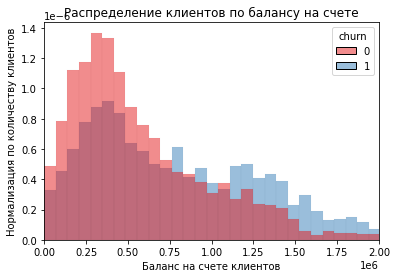

In [43]:
sns.histplot(data=data, hue='churn', x='balance', stat='density', 
                 common_norm=False, palette = 'Set1')
plt.xlim(0, 2000000)
plt.title('Распределение клиентов по балансу на счете')   
plt.xlabel('Баланс на счете клиентов')
plt.ylabel('Нормализация по количеству клиентов')
plt.show;

**По балансу на счете клиентов: отток в пределах баланса больше 750000 тыс**

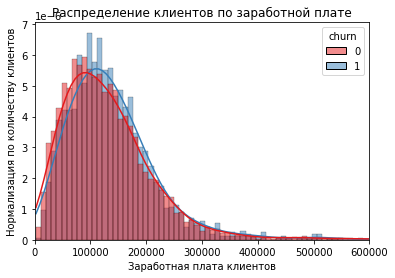

In [44]:
sns.histplot(data=data, hue='churn', x='est_salary', stat='density', 
                 common_norm=False, palette = 'Set1', kde=True)
plt.xlim(0, 600000)
plt.title('Распределение клиентов по заработной плате')   
plt.xlabel('Заработная плата клиентов')
plt.ylabel('Нормализация по количеству клиентов')
plt.show;

**По зарплате клиентов: отток выше у клиентов с зарплатой 100000 до 210000**

Построим гистограммы для дискретных признаков

In [45]:
# С помощью цикла выведем столбчатые диаграммы и диаграммы размаха для категориальных признаков:
#for i in cat.itertuples():
    
    #sns.countplot(data = data, x = i[1], hue= 'churn', palette='Set1')
    #churn_means = data.groupby(i[1])['churn'].mean().reset_index()
    #plt.axhline(churn_means['churn'].mean()*9974, color='blue', linestyle='--')
    #plt.xlabel('')
    #plt.ylabel('Количество клиентов')
    
    #plt.title(f'Средний уровень оттока по {i[2]}')
    #plt.show()

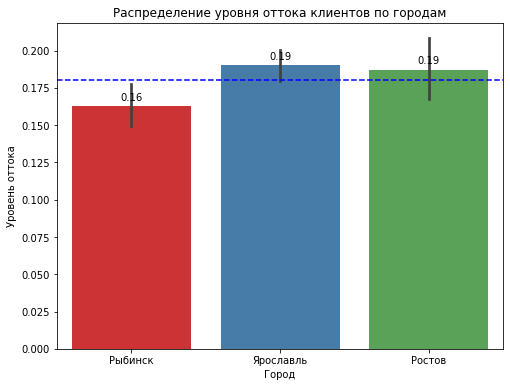

In [46]:
plt.figure(figsize=(8, 6))
a=sns.barplot(data=data, x='city', y='churn', palette = 'Set1')
plt.axhline(y=.18, color='blue', linestyle='--')
plt.title('Распределение уровня оттока клиентов по городам')   
plt.xlabel('Город')
plt.ylabel('Уровень оттока')
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

**По Ярославлю и Ростову отток чуть выше среднего оттока по банку**

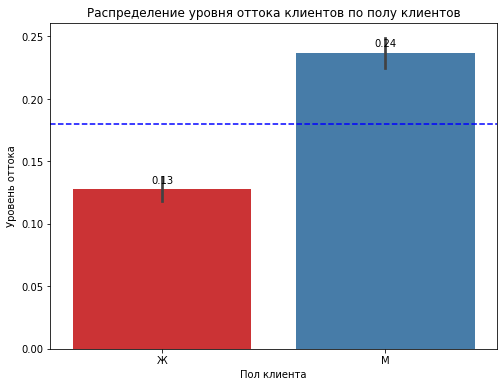

In [47]:
plt.figure(figsize=(8, 6))
a=sns.barplot(data=data, x='gender', y='churn', palette = 'Set1')
plt.axhline(y=.18, color='blue', linestyle='--')
plt.title('Распределение уровня оттока клиентов по полу клиентов')   
plt.xlabel('Пол клиента')
plt.ylabel('Уровень оттока')
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

**У мужчин отток выше, чем у женщин, и выше среднего оттока по банку**

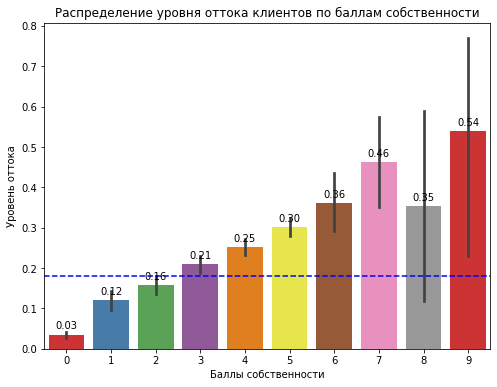

In [48]:
plt.figure(figsize=(8, 6))
a=sns.barplot(data=data, x='equity', y='churn', palette = 'Set1')
plt.axhline(y=.18, color='blue', linestyle='--')

plt.title('Распределение уровня оттока клиентов по баллам собственности')   
plt.xlabel('Баллы собственности')
plt.ylabel('Уровень оттока')
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

**У клиентов с баллами собственности не менее 3 отток выше среднего оттока по банку**

,products,churn_0,churn_1,per_churn
0,0,NaN,1.0,NaN
1,1,3088.0,235.0,0.07
2,2,4141.0,978.0,0.19
3,3,741.0,297.0,0.29
4,4,174.0,300.0,0.63
5,5,11.0,8.0,0.42


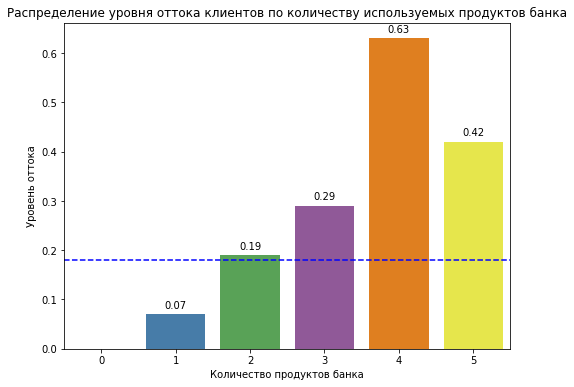

In [49]:
data_1 = data.pivot_table(index = 'products', columns = 'churn', values = 'user_id', aggfunc = 'count').reset_index()
data_1.columns = ['products', 'churn_0', 'churn_1']
data_1['per_churn'] = round(data_1['churn_1']/(data_1['churn_1']+data_1['churn_0']),2)
display(data_1)
plt.figure(figsize=(8, 6))
a=sns.barplot(data=data_1, x='products', y='per_churn', palette = 'Set1')
plt.axhline(y=.18, color='blue', linestyle='--')
plt.title('Распределение уровня оттока клиентов по количеству используемых продуктов банка')   
plt.xlabel('Количество продуктов банка')
plt.ylabel('Уровень оттока')

for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

**У клиентов, использующих более 2 продуктов банка, отток выше среднего оттока по банку**

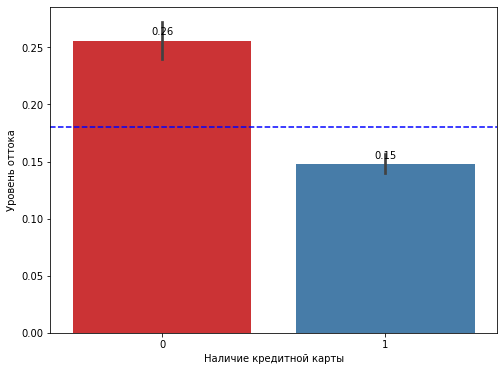

In [75]:
plt.figure(figsize=(8, 6))
a=sns.barplot(data=data, x='credit_card', y='churn', palette = 'Set1')
plt.axhline(y=.18, color='blue', linestyle='--')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Уровень оттока')
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

**У клиентов без кредитной карты отток выше среднего оттока по банку**

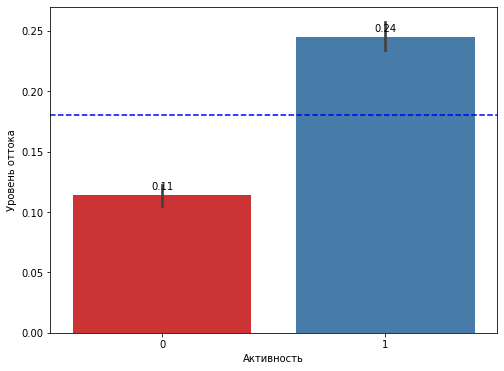

In [76]:
plt.figure(figsize=(8, 6))
a=sns.barplot(data=data, x='last_activity', y='churn', palette = 'Set1')
plt.axhline(y=.18, color='blue', linestyle='--')
plt.xlabel('Активность')
plt.ylabel('Уровень оттока')
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show;

**У активных клиентов отток выше среднего оттока по банку**

**Согласно графикам распределения дискретных (категориальных) величин, отток клиентов был следующим:**
* По Ярославлю и Ростову отток чуть выше среднего оттока по банку
* У мужчин отток выше, чем у женщин почти в 2 раза, и выше среднего оттока по банку
* у клиентов без кредитной карты отток выше среднего оттока по банку
* у активных клиентов отток выше, чем у неактивных и выше среднего оттока по банку.
* У клиентов с баллами собственности не менее 3 отток выше среднего оттока по банку
* У клиентов, использующих более 2 продуктов банка, отток выше среднего оттока по банку

**Рассчитаем процент оттока клиентов в указанных диапазонах каждого признака**

In [52]:
t = round(len(data.query('score>=820 & score<=940 & churn==1')) / len(data.query('score>=820 & score<=940')),3)*100
print('отток клиентов по признаку "Баллы кредитного скоринга" составил: '+ str(t) + ' процента')

отток клиентов по признаку "Баллы кредитного скоринга" составил: 22.900000000000002 процента


In [53]:
m = round(len(data.query('((age>=26 & age<=36) | (age>=51 & age<=61))& churn==1')) / len(data.query('(age>=26 & age<=36) | (age>=51 & age<=61)')),3)*100
print('отток клиентов по признаку "Возраст" составил: '+ str(m) + ' процента')

отток клиентов по признаку "Возраст" составил: 22.6 процента


In [54]:
k = round(len(data.query('equity>=3 & churn==1')) / len(data.query('equity>=3')),3)*100
print('отток клиентов по признаку "Количество баллов собственности" составил: ' + str(k) + ' процента')

отток клиентов по признаку "Количество баллов собственности" составил: 26.400000000000002 процента


In [55]:
l = round(len(data.query('balance>=750000 & churn==1')) / len(data.query('balance>=750000')),3)*100
print('отток клиентов по признаку "Баланс" составил: '+ str(l) + ' процента')

отток клиентов по признаку "Баланс" составил: 34.9 процента


In [56]:
s = round(len(data.query('products>=2 & churn==1')) / len(data.query('products>=2')),3)*100
print('отток клиентов по признаку "Количество продуктов" составил: '+ str(s) + ' процента')

отток клиентов по признаку "Количество продуктов" составил: 23.799999999999997 процента


In [57]:
r = round((len(data.query('est_salary>=100000 & est_salary<=210000 & churn==1')) / 
len(data.query('est_salary>=100000 & est_salary<=210000'))),3)*100
print('отток клиентов по признаку "Заработная плата" составил: '+ str(r) + ' процента')

отток клиентов по признаку "Заработная плата" составил: 20.5 процента


* отток клиентов по признаку "Баллы кредитного скоринга" составил: 22.9 процента
* отток клиентов по признаку "Возраст" составил: 22.6 процента
* отток клиентов по признаку "Количество баллов собственности" составил: 26.4 процента
* отток клиентов по признаку "Баланс" составил: 34.9 процента
* отток клиентов по признаку "Количество продуктов" составил: 23.8 процента
* отток клиентов по признаку "Заработная плата" составил: 20.5 процента

In [58]:
# находим среднее значение по возрасту и зарплате
data_churn = data.pivot_table(index = 'churn', values = ['age', 'balance', 'est_salary', 'score',], aggfunc = 'mean') 
data_churn.columns = ['mn_age', 'mn_balance', 'mn_salary', 'mn_score',]

# находим медианное значение по собственности и количеству продуктов
data_churn_2 = data.pivot_table(index = 'churn', values = ['equity', 'products'], aggfunc = 'median')
data_churn_2.columns = ['md_equity', 'md_products']

# находим моду по полу
agg_func_stats = {'gender': [pd.Series.mode]}
data_churn_5 =data.groupby(['churn']).agg(agg_func_stats)
data_churn_5.columns = ['mod_gender']

# находим моду по городу
agg_func_stats = {'city': [pd.Series.mode]}
data_churn_6 =data.groupby(['churn']).agg(agg_func_stats)
data_churn_6.columns = ['mod_city']

# находим моду по наличию кредитной карты
agg_func_stats = {'credit_card': [pd.Series.mode]}
data_churn_7 =data.groupby(['churn']).agg(agg_func_stats)
data_churn_7.columns = ['mod_ccard']

# объединяем все в одну таблицу
result_1 = data_churn.join([data_churn_2, data_churn_5, data_churn_6, data_churn_7])
result_1['churn'] = ['не ушел', 'ушел']

result_2=result_1.T

result_2['diff, %'] = [3.78, 54.8, 0.4, 2.1, 33, 0, '-', '-', '-', '-']
display(result_2)

churn,0,1,"diff, %"
mn_age,43.020846,41.450247,3.78
mn_balance,733031.630149,1134458.209291,54.8
mn_salary,147674.636297,148289.703683,0.4
mn_score,845.396199,863.416163,2.1
md_equity,3,4,33
md_products,2,2,0
mod_gender,Ж,М,-
mod_city,Ярославль,Ярославль,-
mod_ccard,1,1,-
churn,не ушел,ушел,-


**Отточные клиенты имеют на счете баланс почти в 2 раза больше, также выше баллы собственности, этому больше подвержены мужчины.**

In [59]:
data_2 = data.copy()
data_2.drop(['user_id','Ростов', 'Рыбинск', 'Ярославль', 'Ж', 'М'], axis= 1 , inplace= True )
#phik_corr = data_2.phik_matrix(interval_cols =['score', 'age', 'equity', 'balance', 'products', 'est_salary'])
phik_corr = data_2.phik_matrix(interval_cols =['score', 'balance', 'est_salary'])

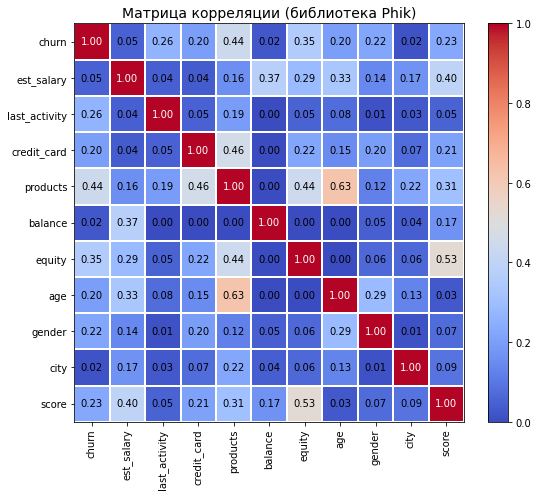

In [60]:

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map="coolwarm",
                        title=r"Матрица корреляции (библиотека Phik)", 
                        fontsize_factor=1, 
                        figsize=(8, 7))
plt.tight_layout()

**Шкала Чеддока**
* Иногда показателям тесноты связи можно дать качественную оценку (шкала Чеддока):
* Количественная мера тесноты связи   & 	Качественная характеристика силы связи
* 0,1 - 0,3	 - Слабая
* 0,3 - 0,5  - Умеренная
* 0,5 - 0,7	- Заметная
* 0,7 - 0,9 - Высокая
* 0,9 - 0,99 - Весьма высокая

**Согласно корреляционной матрице и шкале Чеддока:**
* заметная (0,53) взаимосвязь наблюдается между признаками 'score' и 'equity',
        * (0,63) между 'products' и 'age'
* умеренная (0,46) между 'products' и 'credit_card', 
        * (0,4) между 'score' и 'est_salary', 
        * (0,44) между 'equity' и 'products'

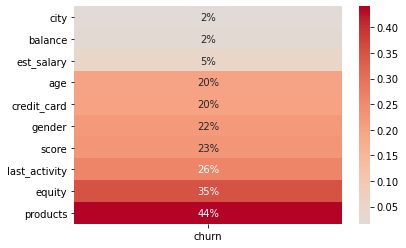

In [61]:
# выведем корреляцию для исследуемого параметра - churn.
sns.heatmap(
            phik_corr.loc[:,['churn']].drop('churn')\
            .sort_values('churn'), annot=True, fmt='.0%', cmap='coolwarm',center=0);

**Отток (churn) коррелирует с количеством продуктов банка (products) (0.44) и оценкой собственности клиента (equity) (0.35), активностью (last_activity) (0.26), баллами кредитного скоринга (score) (0.23), полом клиента (gender) (0.22), возрастом(age)  и наличием кредитной карты (credit_card) (0.2). В связи с этим будем выполнять сегментацию по данным признакам**

### ШАГ 4: ПРОВЕРКА ГИПОТЕЗ
<a id="part_4"></a> 

#### ГИПОТЕЗА 1: средний доход (заработная плата) клиентов влияет на отток

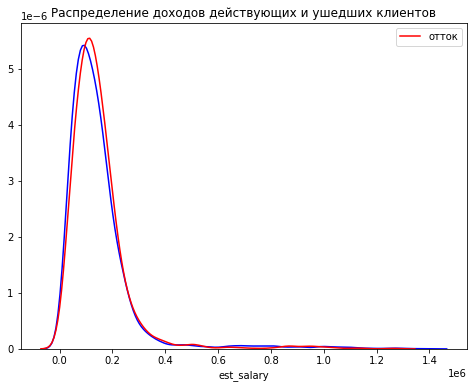

In [62]:
plt.subplots(figsize=(8,6))
sns.kdeplot(data.query('churn== 0')['est_salary'], color = 'b')
sns.kdeplot(data.query('churn== 1')['est_salary'], color = 'r', label = 'отток')

plt.title('Распределение доходов действующих и ушедших клиентов')
plt.xlabel('est_salary')
plt.ylabel('')
plt.legend()
plt.show()

In [63]:
from scipy import stats as st

d = data['est_salary']
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(d)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Тест Шапиро - Уилка показывает, что данные распределены не нормально
* Введем основную и альтернативную гипотезы:
        * нулевая (H0) - доходы действующих клиентов и ушедших одинаковы
        * альтернативная (H1) - доходы действующих клиентов и ушедших отличаются
Зададим стандартный уровень значимости alpha=0.05
Для сравнения средних двух выборок используем u-критерий Манна-Уитни.

In [64]:
from scipy.stats import mannwhitneyu
alpha = .05    

results = mannwhitneyu(data.query('churn== 0')['est_salary'], 
                             data.query('churn== 1')['est_salary'])

print('p-значение: ', results)   
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  MannwhitneyuResult(statistic=7003161.5, pvalue=0.00019411598602784907)
Отвергаем нулевую гипотезу


**Так как p-value < 0.05, нулевую гипотезу о равенстве средних доходов клиентов ушедших и оставшихся отвергаем.**

#### ГИПОТЕЗА 2: возраст клиентов влияет на отток

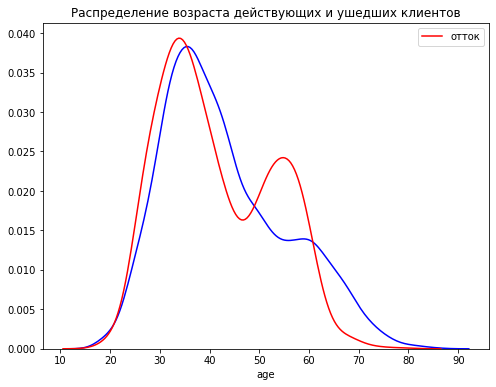

In [65]:
plt.subplots(figsize=(8,6))
sns.kdeplot(data.query('churn== 0')['age'], color = 'b')
sns.kdeplot(data.query('churn== 1')['age'], color = 'r', label = 'отток')

plt.title('Распределение возраста действующих и ушедших клиентов')
plt.xlabel('age')
plt.ylabel('')
plt.legend()
plt.show()

In [66]:
d_1 = data['age']
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(d_1)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Введем основную и альтернативную гипотезы:

      * нулевая (H0) - возраст действующих клиентов и ушедших одинаковы
      * альтернативная (H1) - возраст действующих клиентов и ушедших отличаются

Зададим стандартный уровень значимости alpha=0.05 Для сравнения средних двух выборок используем u-критерий Манна-Уитни

In [67]:
alpha = .05    

results = mannwhitneyu(data.query('churn== 0')['age'], 
                             data.query('churn== 1')['age'])

print('p-значение: ', results)   
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  MannwhitneyuResult(statistic=7925731.5, pvalue=4.576268821627149e-06)
Отвергаем нулевую гипотезу


**Так как p-value < 0.05, нулевую гипотезу о равенстве возраста клиентов ушедших и оставшихся отвергаем.**

**У ушедших и оставшихся клиентов банка имеются различия в возрасте и средних доходах, а следовательно будем выделять сегменты по данным признакам**

### ШАГ 5. ПОДВЕДЕНИЕ ПРОМЕЖУТОЧНЫХ ИТОГОВ
<a id="part_5"></a> 

**ПРОМЕЖУТОЧНЫЙ ВЫВОД:**
        
        Для сегментации клиентов было выполнено следующее:
        
**Построены гистограммы распределения количества отточных и неотточных клиентов для непрерывных величин, при этом отток клиентов был наибольшим на следующих интервалах:**
* балл кредитного скоринга в интервале 820-940 (22.9)
* возраст 26-36 и 51-61 лет (22.6)
* оценка собственности клиента от 3-х и выше (26.4)
* баланс клиента от 750 тыс.руб. (34.9) 
* количество продуктов банка от 3-х и более (23.8)
* заработная плата клиентов от 100 тыс до 210 тыс. (20.5) 

**Построены гистограммы распределения количества отточных и неотточных клиентов для дискретных (категориальных) величин, отток клиентов был следующим (здесь проводили сравнение со средним оттоком по банку):**
* По Ярославлю и Ростову отток чуть выше среднего оттока по банку
* У мужчин отток выше, чем у женщин почти в 2 раза, и выше среднего оттока по банку
* у клиентов без кредитной карты отток выше среднего оттока по банку
* у активных клиентов отток выше, чем у неактивных и выше среднего оттока по банку.
* У клиентов с баллами собственности не менее 3 отток выше среднего оттока по банку
* У клиентов, использующих более 2 продуктов банка, отток выше среднего оттока по банку

**Была построена матрица корреляции с помощью библиотеки Phik (для всех признаков и отдельно для признака оттока клиентов), при этом результаты интерпретировали с помощью шкалы Чеддока: Отток (churn) коррелирует с количеством продуктов банка (products) (0.44) и оценкой собственности клиента (equity) (0.35), активностью (last_activity) (0.26), баллами кредитного скоринга (score) (0.23), полом клиента (gender) (0.22), возрастом(age)  и наличием кредитной карты (credit_card) (0.2). В связи с этим будем выполнять сегментацию по данным признакам**

**Были выдвинуты две гипотезы: о равенстве доходов и о равенстве возраста отточных и неотточных клиентов. Согласно результатам по проверке гипотез:** 

* Доходы клиентов влияют на отток
* Возраст клиентов влияет на отток

**На основании исследования, попробуем выдвинуть 3 сегмента клиентов:**
* СЕГМЕНТ 1. Клиенты с баллами кредитного скоринга от 820 до 940, использующие более 2 банковских продуктов и имеющие на счету более 750000
* СЕГМЕНТ 2. Мужчины с количеством баллов собственности больше 3 и использующие более двух банковских продуктов
* СЕГМЕНТ 3. Активные мужчины с отсутствием кредитной карты

### ШАГ 6. СЕГМЕНТАЦИЯ
<a id="part_6"></a> 

In [68]:
# рассчитаем отток у клиентов с баллами кредитного скоринга от 820 до 940, использующих более 2 банковских продуктов и имеющих на счету более 750000
(len(data.query('(score>=820 & score<=940) & products>2 & balance>=750000 & churn==1'))) / (len(data.query('(score>=820 & score<=940) & products>2 & balance>=750000')))

0.6056338028169014

In [69]:
# рассчитаем объем сегмента "Клиенты с баллами кредитного скоринга от 820 до 940, использующие более 2 банковских продуктов и имеющие на счету более 750000"
len(data.query('(score>=820 & score<=940) & products>2 & balance>=750000'))

497

In [70]:
# рассчитаем отток у мужчин с количеством баллов собственности больше 3 и с количеством продуктов больше 2
(len(data.query('equity >=3 & gender=="М" & products>2 & churn==1')) / 
len(data.query('equity >=3 & gender=="М" & products>2')))

0.5380875202593193

In [71]:
# рассчитаем объем сегмента мужчины с количеством баллов собственности больше 3 и с количеством продуктов больше 2
len(data.query('equity >=3 & gender=="М" & products>2'))

617

In [72]:
# рассчитаем отток у активных мужчин с отсутствием кредитной карты
len(data.query('last_activity==1 & gender=="М" & credit_card==0 & churn==1')) / len(data.query('last_activity==1 & gender=="М" & credit_card==0'))

0.4206128133704735

In [73]:
# рассчитаем объем сегмента у активных мужчин с отсутствием кредитной карты
len(data.query('last_activity==1 & gender=="М" & credit_card==0'))

718

**Провели сегментацию клиентов банка по степени оттока от 42 % до 60,5% и размером групп 497-718 человека:**

* Клиенты с баллами кредитного скоринга от 820 до 940, использующие более 2 банковских продуктов и имеющие на счету более 750000 (отток 60.5%, размер сегмента 497 человек)
* Мужчины с количеством баллов собственности больше 3 и использующие более двух банковских продуктов(отток 53,8%, размер сегмента 617 человек)
* Активные мужчины с отсутствием кредитной карты (отток 42%, размер сегмента 718 человек)

### ШАГ 7. ПРИОРИТИЗАЦИЯ СЕГМЕНТОВ
<a id="part_7"></a> 

* СЕГМЕНТ 1. Клиенты с баллами кредитного скоринга от 820 до 940, использующие более 2 банковских продуктов и имеющие на счету более 750000 (отток 60.5%, размер сегмента 497 человек)
* СЕГМЕНТ 2. Мужчины с количеством баллов собственности больше 3 и использующие более двух банковских продуктов(отток 53,8%, размер сегмента 617 человек)
* СЕГМЕНТ 3. Активные мужчины с отсутствием кредитной карты (отток 42%, размер сегмента 718 человек)

In [74]:
### КОД РЕВЬЮЕРА
df = data
qrys = (
    '(score>=820 & score<=940) & products>2 & balance>=750000',
    'equity >=3 & gender=="М" & products>2',
    'last_activity==1 & gender=="М" & credit_card==0')

df_results = pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys])

display(df_results.style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))
    
all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

ok = True
if len(qrys) != 3:
    ok = False
    print('\033[93m\033[1mРезультаты некорректны, нужно 3 лучших сегмента\033[0m')
    
if df_results['Отток'].min() < df.churn.mean() * 1.5:
    ok = False
    print('\033[93m\033[1mНужно изменить сегменты: присутствуют недостаточно отточные\033[0m')
elif df_results['Отток'].min() < df.churn.mean() * 2:
    print('Часть сегментов не высокоотточна')
elif df_results['Отток'].max() > df.churn.mean() * 3:
    print('Нашли очень отточный сегмент')

if df_results['Размер'].min() < 300:
    ok = False
    print('\033[93m\033[1mНужно изменить сегменты: присутствуют слишком мелкие сегменты\033[0m')
    
if all_catched.shape[0] > 5000:
    ok = False
    print("\033[93m\033[1mОтдел маркетинга не сможет обработать такое количество клиентов\033[0m")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"\033[93m\033[1mВ сегменты попало недостаточное число отточных: {text_churn}\033[0m")
elif ok:
    if 1/2 < share_catched < 2/3:
        print(f"Хороший результат, в сегменты попало: {text_churn}")
    elif share_catched >= 2/3:
        print(f"Прекрасный результат, в сегменты попало: {text_churn}")
    else:
        print(f"В сегменты попало: {text_churn}")
else:
    print(f"В сегменты попало: {text_churn}")

,Отток,Размер
(score>=820 & score<=940) & products>2 & balance>=750000,60.6%,497
"equity >=3 & gender==""М"" & products>2",53.8%,617
"last_activity==1 & gender==""М"" & credit_card==0",42.1%,718


Нашли очень отточный сегмент
В сегменты попало: 670/1819 = 36.8%


### ШАГ 8. ФОРМИРОВАНИЕ РЕКОМЕНДАЦИЙ
<a id="part_8"></a> 

* ДЛЯ 1 СЕГМЕНТА : так как это клиенты с большим количеством баллов - это надежные клиенты банка, а следовательно предпочтительнее всего для банка их удержать. Для данных клиентов можно уменьшить ставку по кредиту или увеличить процент по вкладам (у них имеются суммы на счету)
* ДЛЯ 2 СЕГМЕНТА: во второй сегмент вошли мужчины, у которых большое количество собственности и используемых продуктов банка, а следовательно им можно предложить программы страхования имущества на выгодных условиях.
* ДЛЯ 3 СЕГМЕНТА: это активные мужчины без кредитной карты: можно предложить кредитную карту на выгодных условиях, опять же кешбек при использовании карты, или скидки в магазины, в которые ходят эти мужчины, можно предложить выгодные инвестиционные продукты

### ШАГ 9. ЗАГРУЗКА ПРЕЗЕНТАЦИИ
<a id="part_9"></a> 

https://cloud.mail.ru/public/4j8v/FeADbGH1n

### ШАГ 10. ССЫЛКА НА ДАШБОРД
<a id="part_10"></a> 

https://public.tableau.com/app/profile/olga6696/viz/_16939847636770/Dashboard1#1

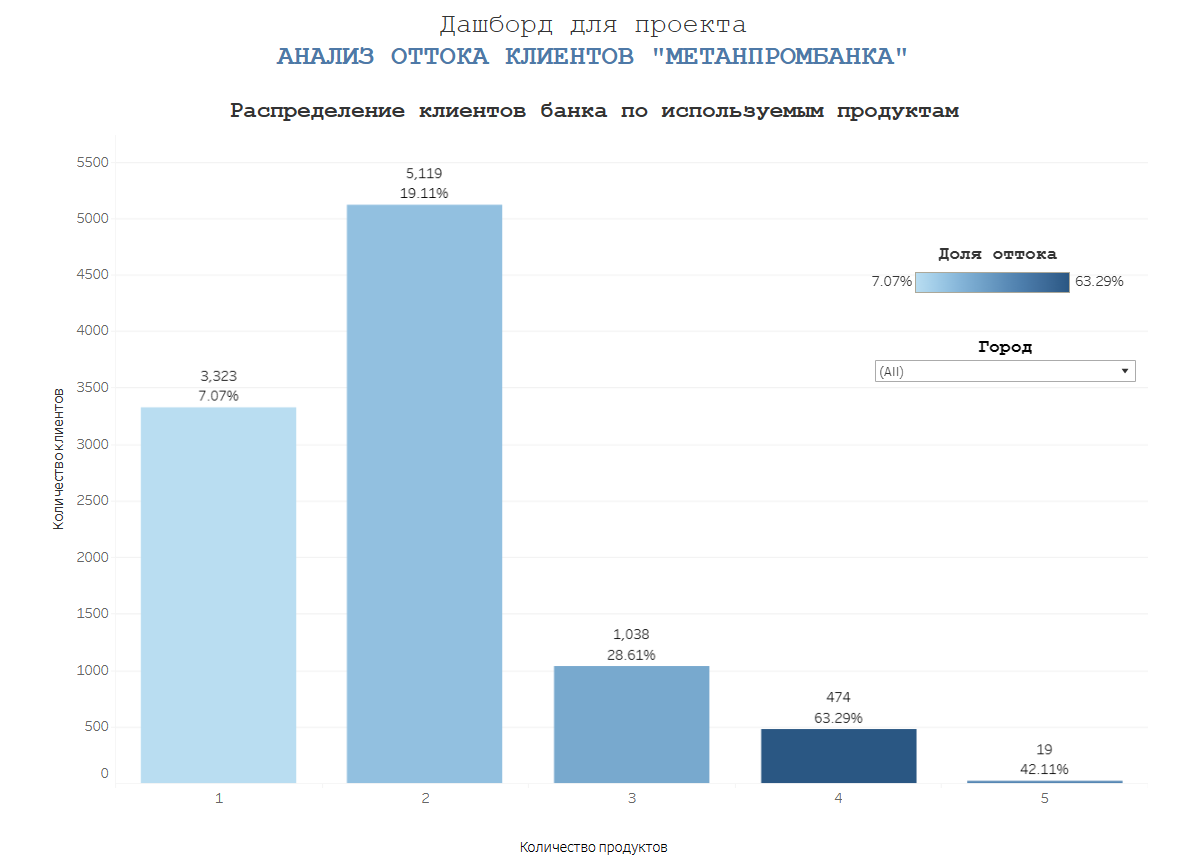